# 📊 EDA of Vacuum-Cleaner

This **exploratory data analysis (EDA)** investigates:

- Features
- Pricing
- Brand distribution of robot vacuum cleaners

It includes analysis of:

- Numeric specifications
- Smart feature adoption
- Brand diversity
- Price trends

to understand **market segmentation** and **competitive dynamics**.



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [67]:
robot_df = pd.read_csv(r"C:\Users\Dell\Desktop\CSI Assignments\AssignmentWeek4\robot_vacuum_cleaner_world.csv")
robot_df.head()
print(robot_df.shape)

(9000, 24)


In [68]:
robot_df.head()

,Brand,Model,Battery_Life_Minutes,Charging_Time_Hours,Dustbin_Capacity_ml,Suction_Power_Pa,Noise_Level_dB,WiFi_Connectivity,App_Control,Voice_Control,...,Runtime_Adjustment,Carpet_Boost,Number_of_Sensors,Weight_kg,Height_cm,Smart_Scheduling,Multi_Floor_Mapping,Mop_Function,Self_Emptying,Price_USD
0,Eufy,Eufy S19 Ultra,81,4.9,587,5046,62,No,Yes,No,...,No,Yes,7,2.6,8.7,Yes,Yes,No,Yes,912
1,Dreame,Dreame R66 Max,66,4.5,563,2237,66,No,Yes,Yes,...,Yes,Yes,19,5.2,7.8,No,No,Yes,Yes,214
2,Samsung,Samsung X51 Pro,185,2.5,386,2262,69,No,No,Yes,...,No,Yes,20,4.4,10.3,Yes,Yes,No,No,269
3,Neato,Neato X42 Ultra,125,4.6,597,4700,68,Yes,No,No,...,No,Yes,12,5.4,9.9,No,Yes,No,No,891
4,Eufy,Eufy V28 Max,149,5.0,523,3818,65,No,Yes,Yes,...,Yes,Yes,14,4.2,7.6,Yes,Yes,Yes,No,261


In [69]:
robot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 9000 non-null   object 
 1   Model                 9000 non-null   object 
 2   Battery_Life_Minutes  9000 non-null   int64  
 3   Charging_Time_Hours   9000 non-null   float64
 4   Dustbin_Capacity_ml   9000 non-null   int64  
 5   Suction_Power_Pa      9000 non-null   int64  
 6   Noise_Level_dB        9000 non-null   int64  
 7   WiFi_Connectivity     9000 non-null   object 
 8   App_Control           9000 non-null   object 
 9   Voice_Control         9000 non-null   object 
 10  Mapping_Technology    9000 non-null   object 
 11  Obstacle_Avoidance    9000 non-null   object 
 12  HEPA_Filter           9000 non-null   object 
 13  Auto_Dock             9000 non-null   object 
 14  Runtime_Adjustment    9000 non-null   object 
 15  Carpet_Boost         

In [70]:
robot_df.describe()

,Battery_Life_Minutes,Charging_Time_Hours,Dustbin_Capacity_ml,Suction_Power_Pa,Noise_Level_dB,Number_of_Sensors,Weight_kg,Height_cm,Price_USD
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,129.758889,4.246456,523.820111,3761.112556,62.504778,13.033222,4.010044,8.993878,676.761778
std,40.807829,1.007151,101.311195,1295.790357,4.638310,4.311479,0.875821,1.156980,305.631491
min,60.000000,2.500000,350.000000,1500.000000,55.000000,6.000000,2.500000,7.000000,150.000000
25%,95.000000,3.400000,435.750000,2645.500000,58.000000,9.000000,3.300000,8.000000,410.000000
50%,129.000000,4.200000,524.000000,3774.000000,63.000000,13.000000,4.000000,9.000000,676.000000
75%,165.000000,5.100000,611.000000,4892.000000,67.000000,17.000000,4.800000,10.000000,946.000000
max,200.000000,6.000000,700.000000,5999.000000,70.000000,20.000000,5.500000,11.000000,1200.000000


In [71]:
robot_df.isnull().sum()

Brand                   0
Model                   0
Battery_Life_Minutes    0
Charging_Time_Hours     0
Dustbin_Capacity_ml     0
Suction_Power_Pa        0
Noise_Level_dB          0
WiFi_Connectivity       0
App_Control             0
Voice_Control           0
Mapping_Technology      0
Obstacle_Avoidance      0
HEPA_Filter             0
Auto_Dock               0
Runtime_Adjustment      0
Carpet_Boost            0
Number_of_Sensors       0
Weight_kg               0
Height_cm               0
Smart_Scheduling        0
Multi_Floor_Mapping     0
Mop_Function            0
Self_Emptying           0
Price_USD               0
dtype: int64

## There are no null values in dataset

In [72]:
binary_cols = [
    'WiFi_Connectivity', 'App_Control', 'Voice_Control', 'Mapping_Technology',
    'Obstacle_Avoidance', 'HEPA_Filter', 'Auto_Dock', 'Runtime_Adjustment',
    'Carpet_Boost', 'Smart_Scheduling', 'Multi_Floor_Mapping', 
    'Mop_Function', 'Self_Emptying'
]
for col in binary_cols:
    print(robot_df[col].value_counts())


WiFi_Connectivity
Yes    4532
No     4468
Name: count, dtype: int64
App_Control
Yes    4616
No     4384
Name: count, dtype: int64
Voice_Control
Yes    4566
No     4434
Name: count, dtype: int64
Mapping_Technology
Lidar+Camera    2266
Lidar           2263
Camera          2245
Infrared        2226
Name: count, dtype: int64
Obstacle_Avoidance
No     4541
Yes    4459
Name: count, dtype: int64
HEPA_Filter
No     4535
Yes    4465
Name: count, dtype: int64
Auto_Dock
No     4580
Yes    4420
Name: count, dtype: int64
Runtime_Adjustment
Yes    4562
No     4438
Name: count, dtype: int64
Carpet_Boost
No     4516
Yes    4484
Name: count, dtype: int64
Smart_Scheduling
Yes    4554
No     4446
Name: count, dtype: int64
Multi_Floor_Mapping
No     4584
Yes    4416
Name: count, dtype: int64
Mop_Function
No     4521
Yes    4479
Name: count, dtype: int64
Self_Emptying
Yes    4513
No     4487
Name: count, dtype: int64


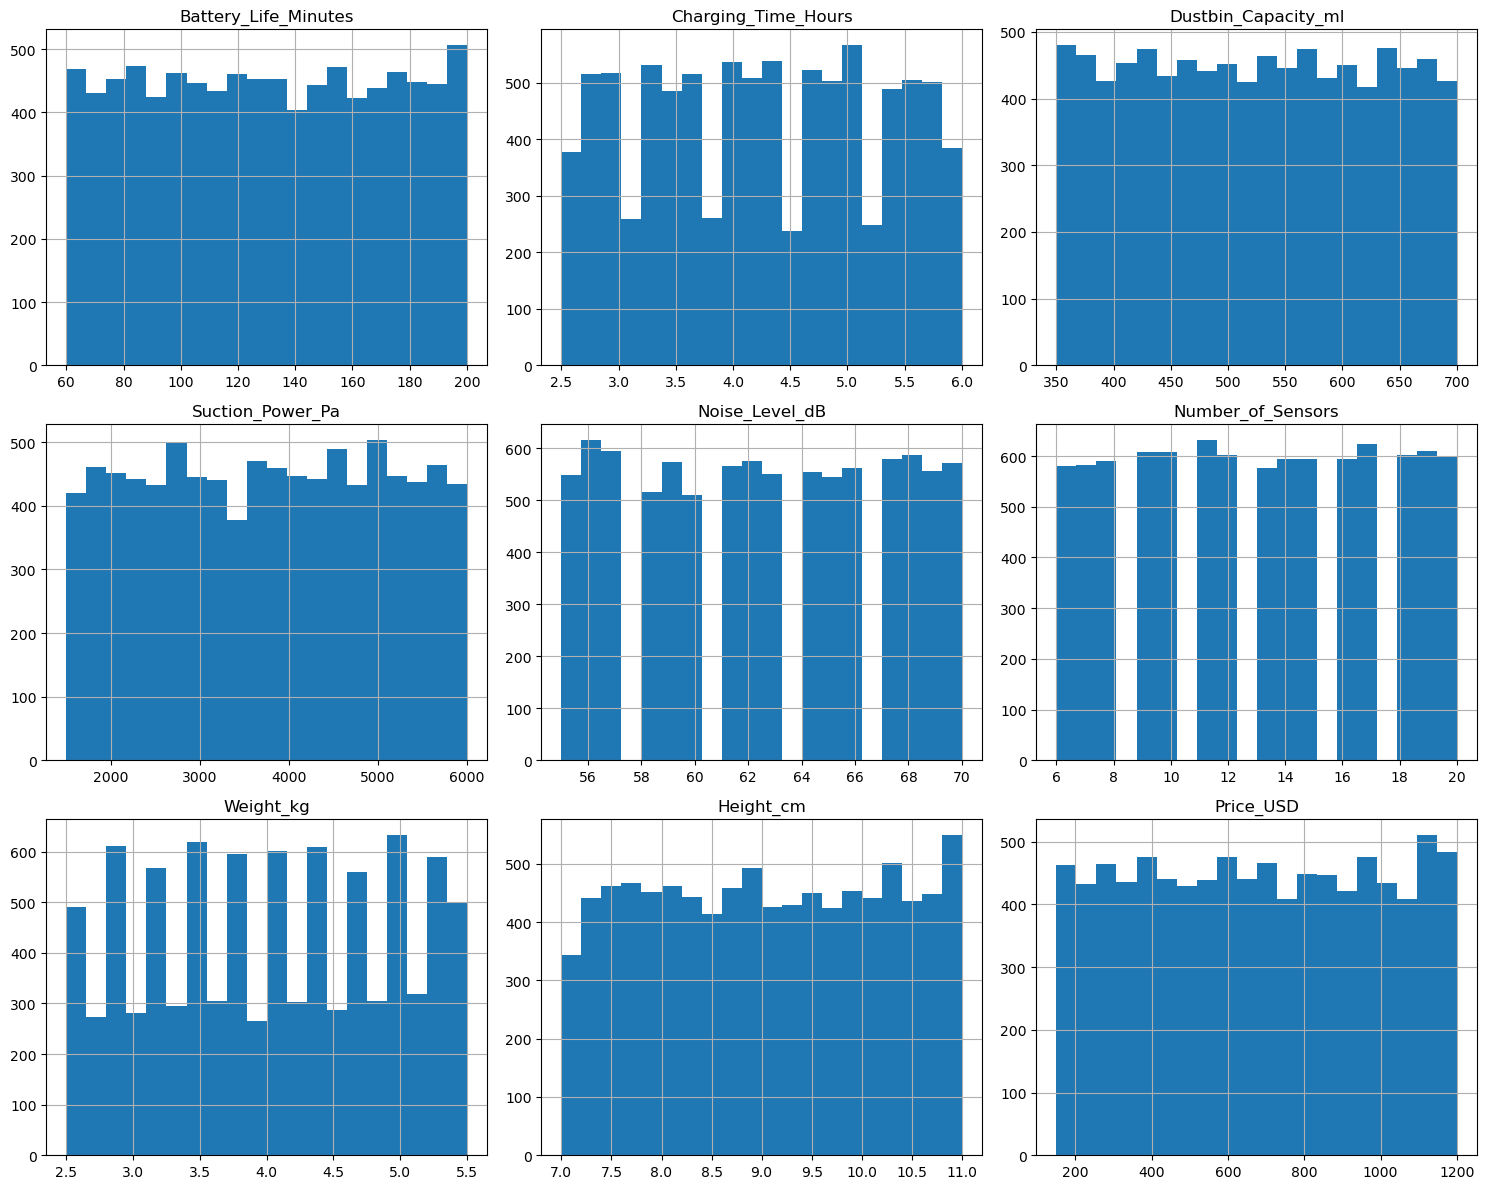

In [73]:
robot_df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


  EDA histograms reveal that robot vacuum features often cluster into design tiers, especially in charging time, noise level, number of sensors, and weight. Price is broadly distributed across $200–$1200, indicating a competitive market with both budget and premium segments. Suction power and battery life show diverse ranges without clear peaks, suggesting these features are used to differentiate products more subtly.

In [74]:
len(robot_df.Model.unique())


8113

In [75]:
len(robot_df.Brand.unique())


37

In [76]:
num_cols = [cols for cols in robot_df.columns if robot_df[cols].dtype!="object"]
num_cols

['Battery_Life_Minutes',
 'Charging_Time_Hours',
 'Dustbin_Capacity_ml',
 'Suction_Power_Pa',
 'Noise_Level_dB',
 'Number_of_Sensors',
 'Weight_kg',
 'Height_cm',
 'Price_USD']

In [77]:
inputs_numerical = robot_df[num_cols]
inputs_numerical.head()

,Battery_Life_Minutes,Charging_Time_Hours,Dustbin_Capacity_ml,Suction_Power_Pa,Noise_Level_dB,Number_of_Sensors,Weight_kg,Height_cm,Price_USD
0,81,4.9,587,5046,62,7,2.6,8.7,912
1,66,4.5,563,2237,66,19,5.2,7.8,214
2,185,2.5,386,2262,69,20,4.4,10.3,269
3,125,4.6,597,4700,68,12,5.4,9.9,891
4,149,5.0,523,3818,65,14,4.2,7.6,261


<Axes: >

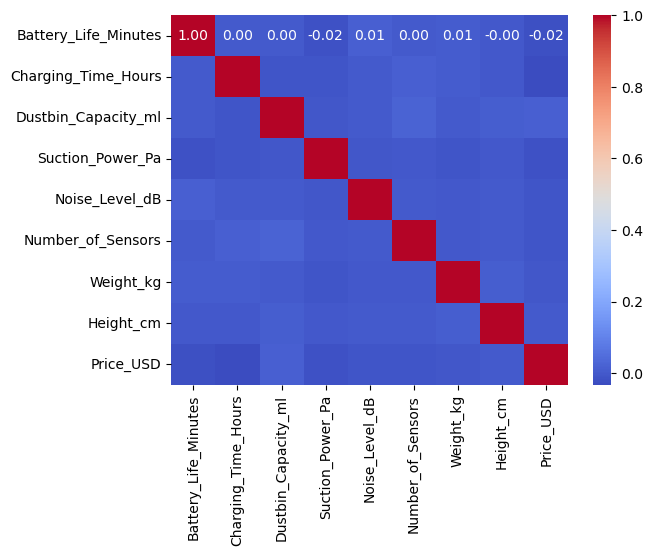

In [78]:
corr = inputs_numerical.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")


- ✅ The heatmap shows **very low correlations (near zero)** between numeric features and `Price_USD`.
- ✅ No strong **linear relationships** exist among the key specifications.
- 🔎 Let us **confirm our suspicion** by using a `RandomForest` model to find **feature importance** for the numeric columns.


In [79]:
X = robot_df.drop(columns=['Price_USD', 'Brand', 'Model'])  # drop price and identifiers
y = robot_df['Price_USD']
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



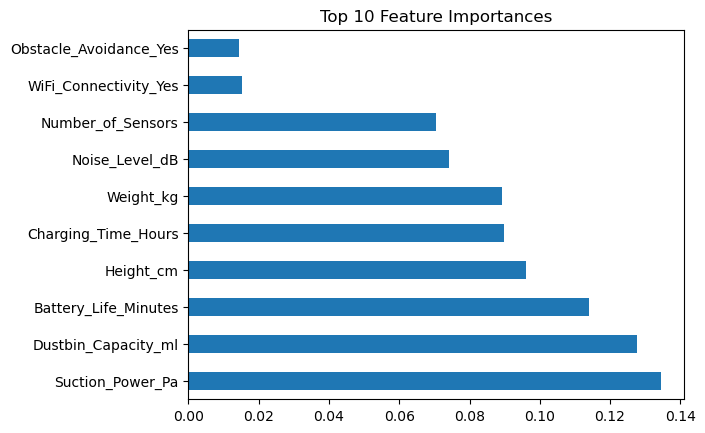

In [80]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


### Model Evaluation Summary

✅ **Training Performance**: The `RandomForestRegressor` achieved a high training R² of **0.86**, but a **negative test R² (-0.03)**, indicating **severe overfitting**.

✅ **Key Predictors**: The most important features were:
- Suction Power
- Dustbin Capacity
- Battery Life
- Height

These suggest that these specifications most strongly influence price in the model.

✅ **Conclusion**: While certain features are relevant, the model **fails to generalize**. Addressing this will require **more data**, **feature engineering**, or **regularization** for reliable prediction.



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


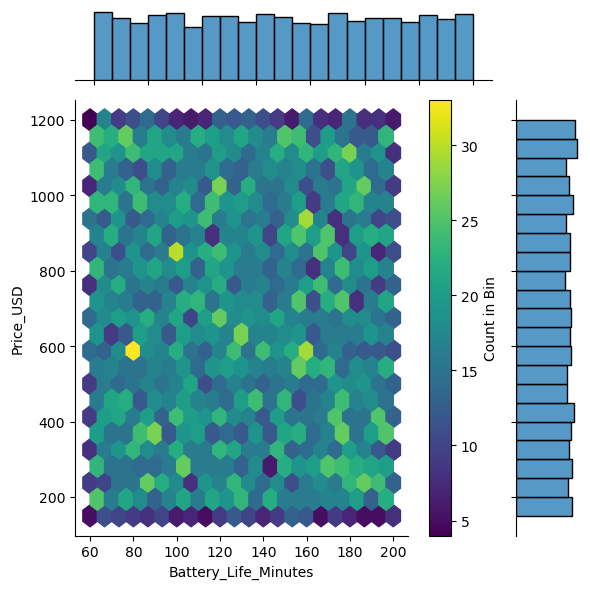

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


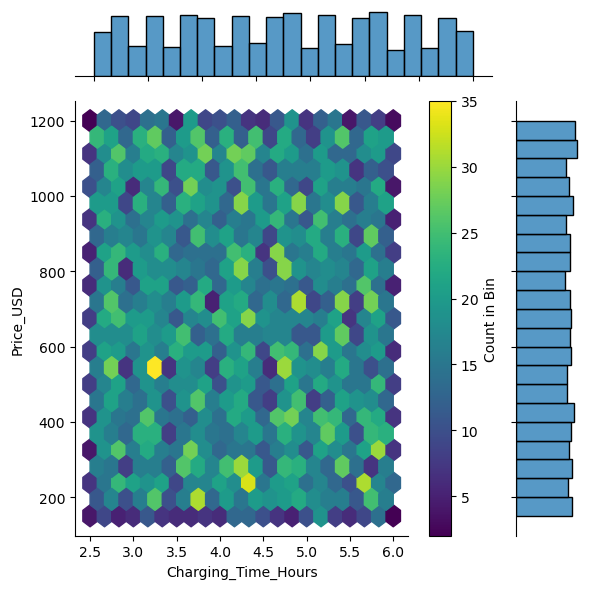

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


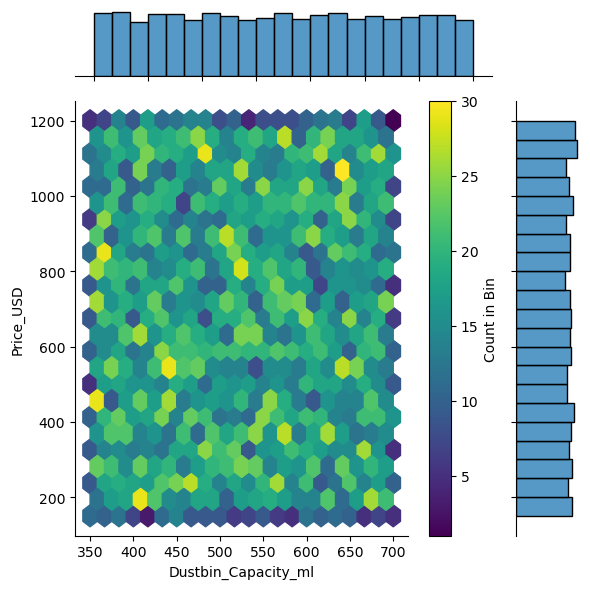

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


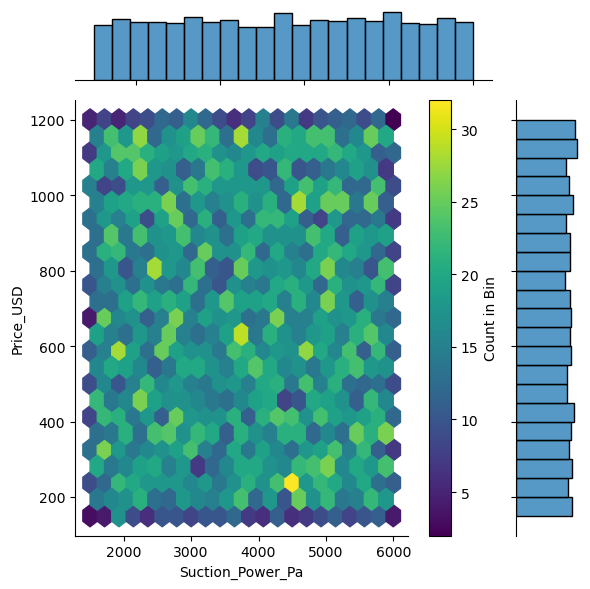

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


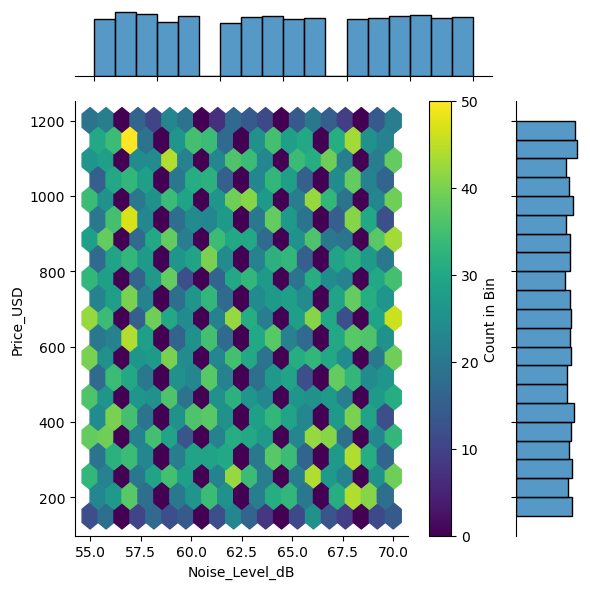

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


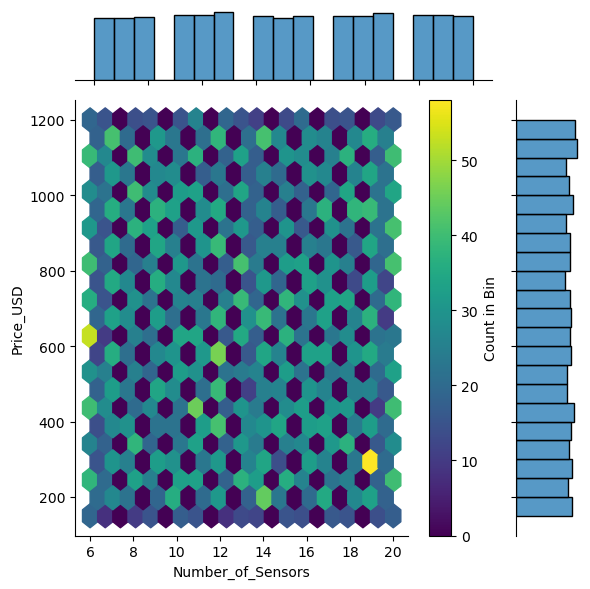

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


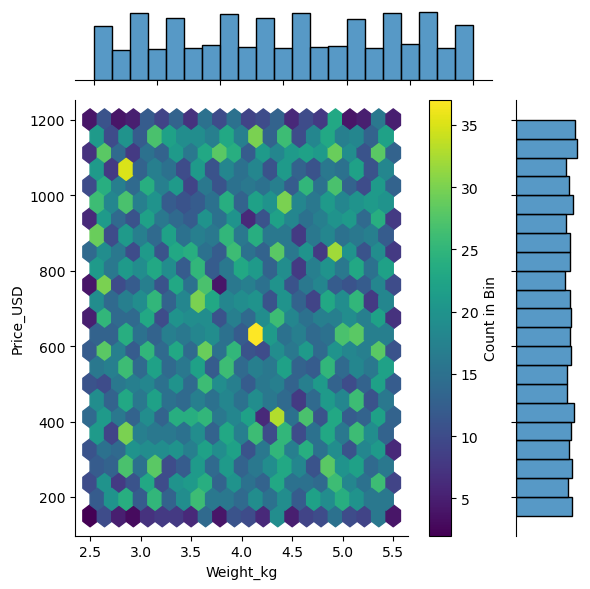

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


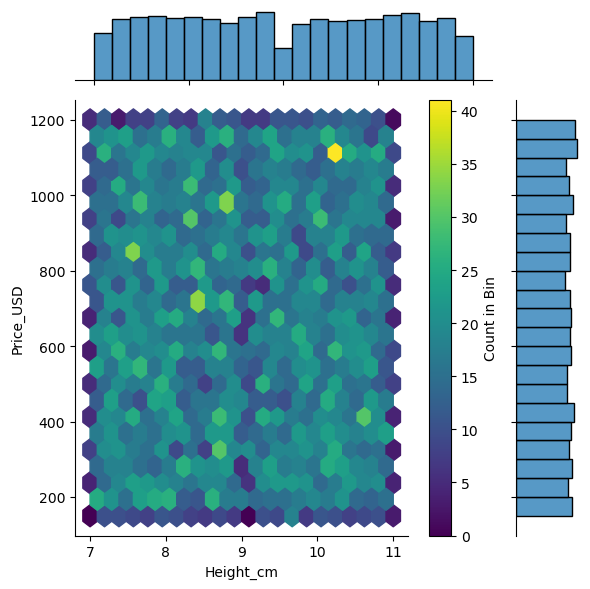

In [81]:
for i in inputs_numerical.columns[:-1]:
    sns.jointplot(x=f'{i}', y=f'{inputs_numerical.columns[-1]}', data=inputs_numerical, kind='hex',cmap="viridis")
    plt.colorbar(label='Count in Bin')
    plt.tight_layout()
    plt.show()

- Many vacuums cluster around **$600 with ~80 min battery life**, showing a slight trend that **longer battery life increases price**, but with limited confirmation.
- **Charging time** shows that **shorter charging increases price** (e.g. 3–3.5 hrs → $500–600), while **longer charging (>4.5 hrs)** tends to reduce price.
- **Dustbin capacity** clearly correlates with higher price—larger capacity vacuums generally cost more.
- **Suction power** lacks a clear trend; some cheaper models still offer **very strong suction**, showing price doesn’t strictly depend on this.
- **Noise level** shows that **quieter vacuums are pricier**, fitting the idea of this being a premium/luxury feature.
- Features like **number of sensors, weight, and height** show mixed or unclear trends; while lighter, taller vacuums may cost more, overall relationships need domain expertise to explain fully.


In [82]:
categorical_cols = [cols for cols in robot_df.columns if cols not in inputs_numerical]
inputs_categorical = robot_df[categorical_cols]

In [83]:
inputs_categorical.head(10)


,Brand,Model,WiFi_Connectivity,App_Control,Voice_Control,Mapping_Technology,Obstacle_Avoidance,HEPA_Filter,Auto_Dock,Runtime_Adjustment,Carpet_Boost,Smart_Scheduling,Multi_Floor_Mapping,Mop_Function,Self_Emptying
0,Eufy,Eufy S19 Ultra,No,Yes,No,Lidar,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
1,Dreame,Dreame R66 Max,No,Yes,Yes,Infrared,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes
2,Samsung,Samsung X51 Pro,No,No,Yes,Camera,Yes,Yes,No,No,Yes,Yes,Yes,No,No
3,Neato,Neato X42 Ultra,Yes,No,No,Lidar,Yes,Yes,Yes,No,Yes,No,Yes,No,No
4,Eufy,Eufy V28 Max,No,Yes,Yes,Camera,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
5,iRobot,iRobot X59 Pro,No,No,No,Infrared,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes
6,Xiaomi,Xiaomi V19,Yes,No,Yes,Lidar,Yes,Yes,No,Yes,No,No,Yes,No,No
7,Samsung,Samsung S6 Ultra,Yes,No,Yes,Lidar+Camera,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes
8,iRobot,iRobot R64,Yes,Yes,No,Infrared,Yes,No,Yes,Yes,No,Yes,No,No,No
9,Eufy,Eufy X53 Ultra,Yes,No,Yes,Lidar+Camera,Yes,Yes,No,No,No,Yes,Yes,No,No


In [84]:
for i in categorical_cols:
    print(f"total number of unique categories in {i} are : {len(inputs_categorical[i].unique())}")
    print("\n")

total number of unique categories in Brand are : 37


total number of unique categories in Model are : 8113


total number of unique categories in WiFi_Connectivity are : 2


total number of unique categories in App_Control are : 2


total number of unique categories in Voice_Control are : 2


total number of unique categories in Mapping_Technology are : 4


total number of unique categories in Obstacle_Avoidance are : 2


total number of unique categories in HEPA_Filter are : 2


total number of unique categories in Auto_Dock are : 2


total number of unique categories in Runtime_Adjustment are : 2


total number of unique categories in Carpet_Boost are : 2


total number of unique categories in Smart_Scheduling are : 2


total number of unique categories in Multi_Floor_Mapping are : 2


total number of unique categories in Mop_Function are : 2


total number of unique categories in Self_Emptying are : 2




#Products Per Brand

Brand
iRobot       521
Samsung      489
LG           482
Roborock     476
Ecovacs      473
Dreame       462
Neato        449
Xiaomi       446
Proscenic    439
Eufy         436
Haier        189
Shark        186
Amarey       186
Narwal       183
Dyson        172
Viomi        171
Yeedi        170
Lenovo       168
Kyvol        168
Trifo        164
Hobot        160
Mamibot      159
Bissell      159
Panasonic    156
ILIFE        155
TCL          155
Neabot       154
Lefant       154
Cecotec      152
Tesvor       149
Honiture     149
Puppyoo      147
Ultenic      146
Zigma        145
Miele        144
Rowenta      144
Medion       142
Name: count, dtype: int64


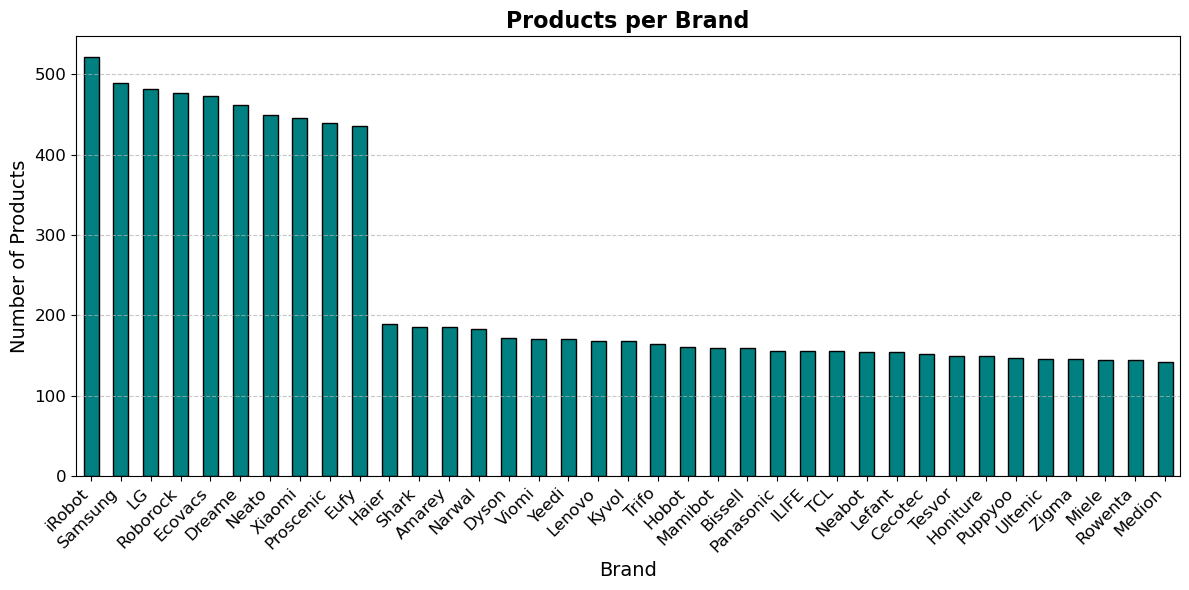

In [88]:
brand_counts = robot_df['Brand'].value_counts()
print(brand_counts)

plt.figure(figsize=(12, 6))
brand_counts.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Products per Brand', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [86]:
print("Number of unique models:", robot_df['Model'].nunique())


Number of unique models: 8113


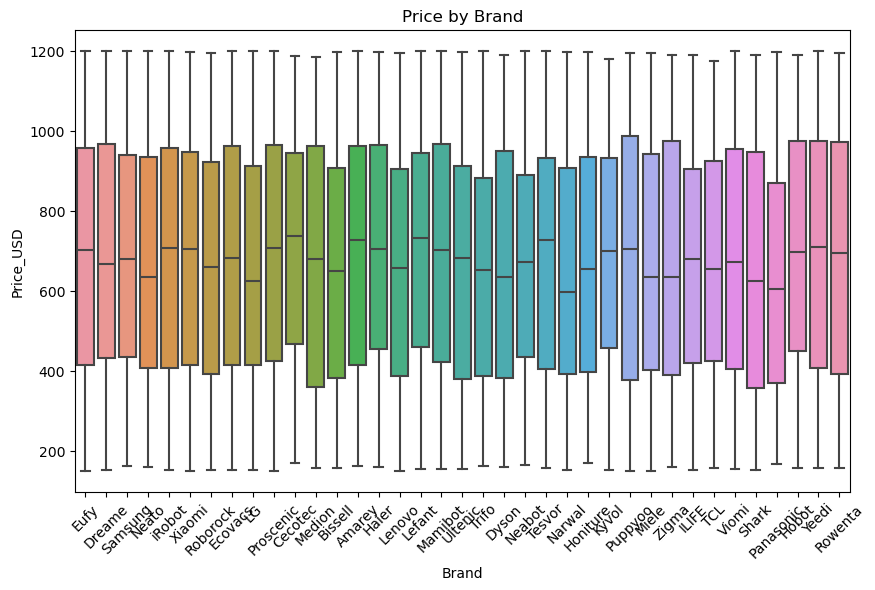

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Price_USD', data=robot_df)
plt.xticks(rotation=45)
plt.title('Price by Brand')
plt.show()